In [150]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')

In [7]:
study_results.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')

In [13]:
# Combine the data into a single dataset
combined_mouse_study_results = pd.merge(study_results, mouse_metadata,on="Mouse ID", how="left")

In [14]:
# Display the data table for preview
combined_mouse_study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [24]:
# Checking the number of mice.
mice_count = mouse_metadata['Mouse ID'].count()
mice_count

249

In [54]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_mouse_study_results.loc[combined_mouse_study_results.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [94]:
# Checking the number of mice in the clean DataFrame.

duplicate_mice_list = combined_mouse_study_results[combined_mouse_study_results['Mouse ID'].str.contains('g989')]
duplicate_mice_list

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [95]:
# Creating a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_metadata[mouse_metadata['Mouse ID'].str.contains('g989') == False]
clean_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [196]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = clean_mouse_data["Mouse ID"].nunique()
mice_count_clean

248

In [97]:
#merged clean data frame
clean_mouse_data_total = combined_mouse_study_results[combined_mouse_study_results['Mouse ID'].str.contains('g989') == False]
clean_mouse_data_total.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


Summary Statistics

In [120]:
# Generating a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean_tumor = clean_mouse_data_total.groupby(["Drug Regimen"]).mean()['Tumor Volume (mm3)']
median_tumor = clean_mouse_data_total.groupby(["Drug Regimen"]).median()['Tumor Volume (mm3)']
variance_tumor = clean_mouse_data_total.groupby(["Drug Regimen"]).var()['Tumor Volume (mm3)']
std_tumor = clean_mouse_data_total.groupby(["Drug Regimen"]).std()['Tumor Volume (mm3)']
SEM_tumore = clean_mouse_data_total.groupby(["Drug Regimen"]).sem()['Tumor Volume (mm3)']

summary_tumor_volume = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor,
    "Median Tumor Volume": median_tumor,
    "Tumor Volume Variance": variance_tumor,
    "Tumor Volume Std. Dev.": std_tumor,
    "Tumor Volume Std. Err.": SEM_tumore})
summary_tumor_volume


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [148]:
# summary statistics in a single line using the aggregation method

clean_mouse_data_total.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':["mean","median","var","std","sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts
 - Generate two bar charts. Both charts should be identical and show the total number of time points for all mice tested for each drug regimen throughout the study.
 - Generate two pie charts. Both charts should be identical and show the distribution of female versus male mice in the study.

In [185]:
# Generating a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen_data = clean_mouse_data_total['Drug Regimen'].value_counts()
drug_regimen_data

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

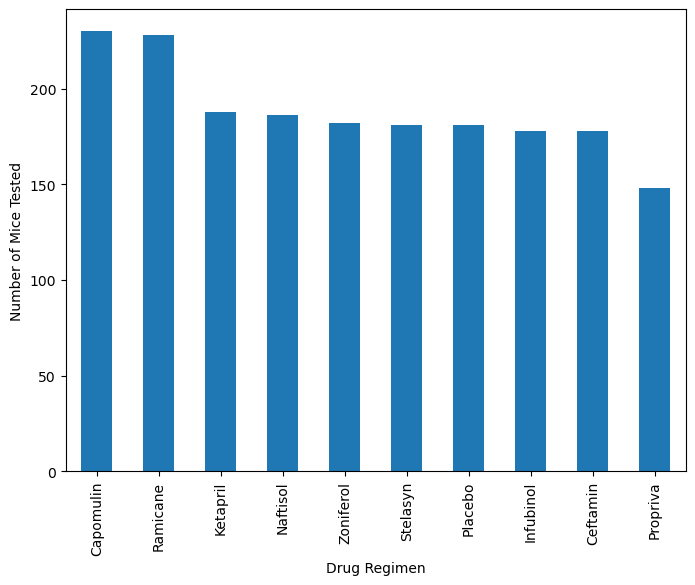

In [189]:
drug_regimen_data.plot(kind = 'bar', figsize =(8,6), xlabel= 'Drug Regimen', ylabel = 'Number of Mice Tested')
plt.show


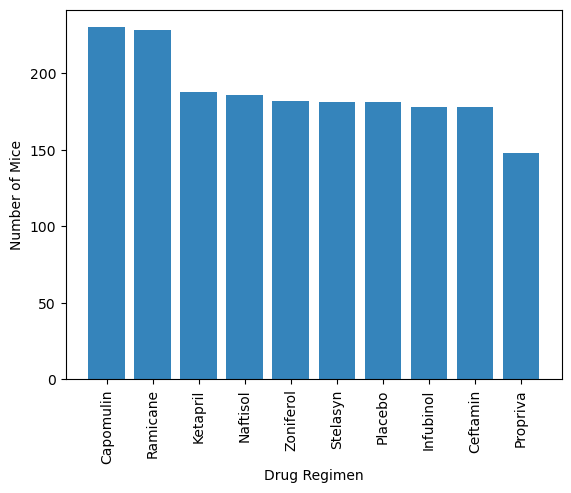

In [219]:
# Generating a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drug_regimen_data1 = clean_mouse_data_total['Drug Regimen'].value_counts()
x_axis = drug_regimen_data1.index.values
y_axis = drug_regimen_data1.values
plt.bar(x_axis, y_axis, alpha=0.9, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()

In [208]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mouse_data = clean_mouse_data_total['Sex'].value_counts()
mouse_data


Male      958
Female    922
Name: Sex, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

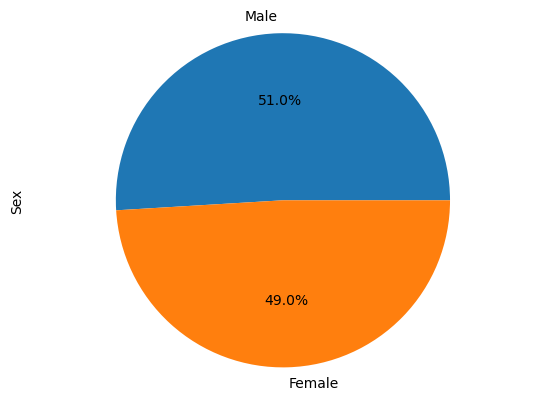

In [251]:
mouse_data.plot(kind = 'pie',autopct="%1.1f%%")
plt.axis("equal")
plt.show

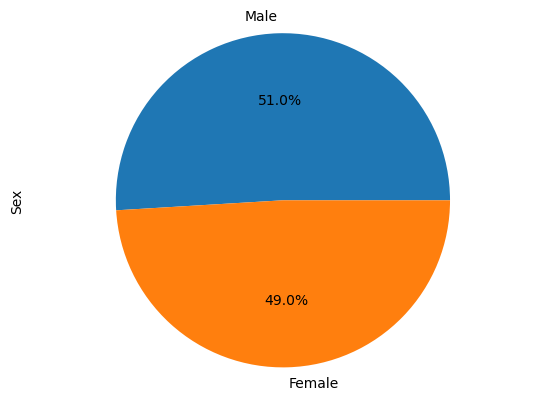

In [221]:
# Generating a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49, 51]
plot = mouse_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.axis("equal")
plt.show()

# Quartiles, Outliers and Boxplots
 - Create a grouped DataFrame that shows the last (greatest) time point for each mouse. Merge this grouped DataFrame with the original cleaned DataFrame.
- Create a list that holds the treatment names as well as a second, empty list to hold the tumor volume data.
- Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment. Append the resulting final tumor volumes for each drug to the empty list.
- Determine outliers by using the upper and lower bounds, and then print the results.

In [224]:
#Calculating the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin.
Capomulin_regimen = clean_mouse_data_total.loc[clean_mouse_data_total["Drug Regimen"] == "Capomulin",:]
Ramicane_regimen = clean_mouse_data_total.loc[clean_mouse_data_total["Drug Regimen"] == "Ramicane", :]
Infubinol_regimen = clean_mouse_data_total.loc[clean_mouse_data_total["Drug Regimen"] == "Infubinol", :]
Ceftamin_regimen = clean_mouse_data_total.loc[clean_mouse_data_total["Drug Regimen"] == "Ceftamin", :]

In [229]:
#Start by getting the last (greatest) timepoint for each mouse
#1. Capomulin regimen
Capomulin_timepoint_last = Capomulin_regimen.groupby('Mouse ID').max()['Timepoint']
Capomulin_timepoint_last

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulin_volume = pd.DataFrame(Capomulin_timepoint_last)
Capomulin_volume
Capomulin_merge = pd.merge(Capomulin_volume, clean_mouse_data_total, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [231]:
Capomulin_tumor_volume = Capomulin_merge["Tumor Volume (mm3)"]
Capomulin_tumor_volume

0     38.982878
1     38.939633
2     30.485985
3     37.074024
4     40.159220
5     47.685963
6     37.311846
7     38.125164
8     38.753265
9     41.483008
10    38.846876
11    28.430964
12    33.329098
13    46.539206
14    32.377357
15    41.581521
16    23.343598
17    40.728578
18    34.455298
19    31.023923
20    40.658124
21    39.952347
22    36.041047
23    28.484033
24    31.896238
Name: Tumor Volume (mm3), dtype: float64

In [232]:
#2. Ramicane Regimen

Ramicane_timepoint_last = Ramicane_regimen.groupby('Mouse ID').max()['Timepoint']
Ramicane_volume = pd.DataFrame(Ramicane_timepoint_last)
Ramicane_merge = pd.merge(Ramicane_volume, clean_mouse_data_total, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()
Ramicane_tumor_volume = Ramicane_merge["Tumor Volume (mm3)"]


In [233]:
# 3.Inbufinol regimen
Infubinol_timepoint_last = Infubinol_regimen.groupby('Mouse ID').max()['Timepoint']
Infubinol_volume = pd.DataFrame(Infubinol_timepoint_last)
Infubinol_merge = pd.merge(Infubinol_volume, clean_mouse_data_total, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [234]:
Infubinol_tumor_volume = Infubinol_merge["Tumor Volume (mm3)"]

In [235]:
# 4. Ceftamin regimen
Ceftamin_timepoint_last = Ceftamin_regimen.groupby('Mouse ID').max()['Timepoint']
Ceftamin_volume = pd.DataFrame(Ceftamin_timepoint_last)
Ceftamin_merge = pd.merge(Ceftamin_volume, clean_mouse_data_total, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25


In [275]:
Ceftamin_tumor_volume = Ceftamin_merge["Tumor Volume (mm3)"]

In [279]:
#Creating a list that holds the treatment names and a empty list to hold the tumor volume data.

Treatment_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volume_data = []

#Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment. Append the resulting final tumor volumes for each drug to the empty list.
for drug in Treatment_names:
    print(drug)

Capomulin
Ramicane
Infubinol
Ceftamin


# Line and Scatter Plots


In [238]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_mouse = Capomulin_regimen.loc[Capomulin_regimen["Mouse ID"] == "l509",:]
Capomulin_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


Text(0, 0.5, 'Tumor Volume (mm3)')

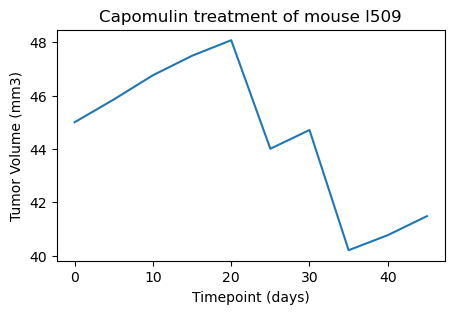

In [250]:
# Creating a title, x label, and y label for line chart

fig, ax = plt.subplots(figsize=(5,3)) 
x = Capomulin_mouse["Timepoint"]
y = Capomulin_mouse["Tumor Volume (mm3)"]

plt.plot(x, y,linewidth=1.5 )
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

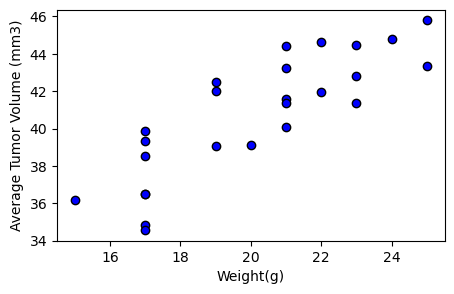

In [256]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig, ax = plt.subplots(figsize=(5,3))
aver_tumor_Capomulin =Capomulin_regimen.groupby(['Mouse ID']).mean()
plt.scatter(aver_tumor_Capomulin['Weight (g)'],aver_tumor_Capomulin['Tumor Volume (mm3)'], marker="o", facecolors="blue", edgecolors="black")

# Creating x label, and y label for scatter chart
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")


# Correlation and Regression

In [264]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
#Calculating the correlation coefficient 

correlation_coefficient = st.pearsonr(aver_tumor_Capomulin['Weight (g)'],aver_tumor_Capomulin['Tumor Volume (mm3)'])
correlation_coefficient


PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712483e-07)

In [266]:
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation_coefficient[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


In [270]:
from scipy.stats import linregress

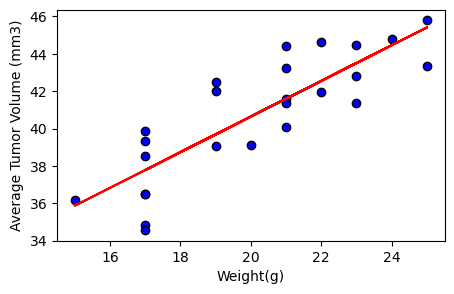

In [274]:
fig, ax = plt.subplots(figsize=(5,3))
aver_tumor_Capomulin =Capomulin_regimen.groupby(['Mouse ID']).mean()
plt.scatter(aver_tumor_Capomulin['Weight (g)'],aver_tumor_Capomulin['Tumor Volume (mm3)'], marker="o", facecolors="blue", edgecolors="black")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")

#Calculating linear regression model
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress(aver_tumor_Capomulin['Weight (g)'],aver_tumor_Capomulin['Tumor Volume (mm3)'])
pe_value = aver_tumor_Capomulin['Weight (g)']*pe_slope + pe_int
plt.plot(aver_tumor_Capomulin['Weight (g)'],pe_value,"-", color='red')